In [2]:
# Let's start by loading the data and taking a quick look at its structure.
import pandas as pd

# Load the dataset
file_path = r'C:\Users\fajar\Downloads\penguins_size.csv'
penguins_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
penguins_df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Check for missing values
missing_values = penguins_df.isnull().sum()
missing_values_percentage = (missing_values / len(penguins_df)) * 100

# Combine missing values and their percentages into a dataframe
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)

missing_data


,Missing Values,Percentage
sex,10,2.906977
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
species,0,0.000000
island,0,0.000000


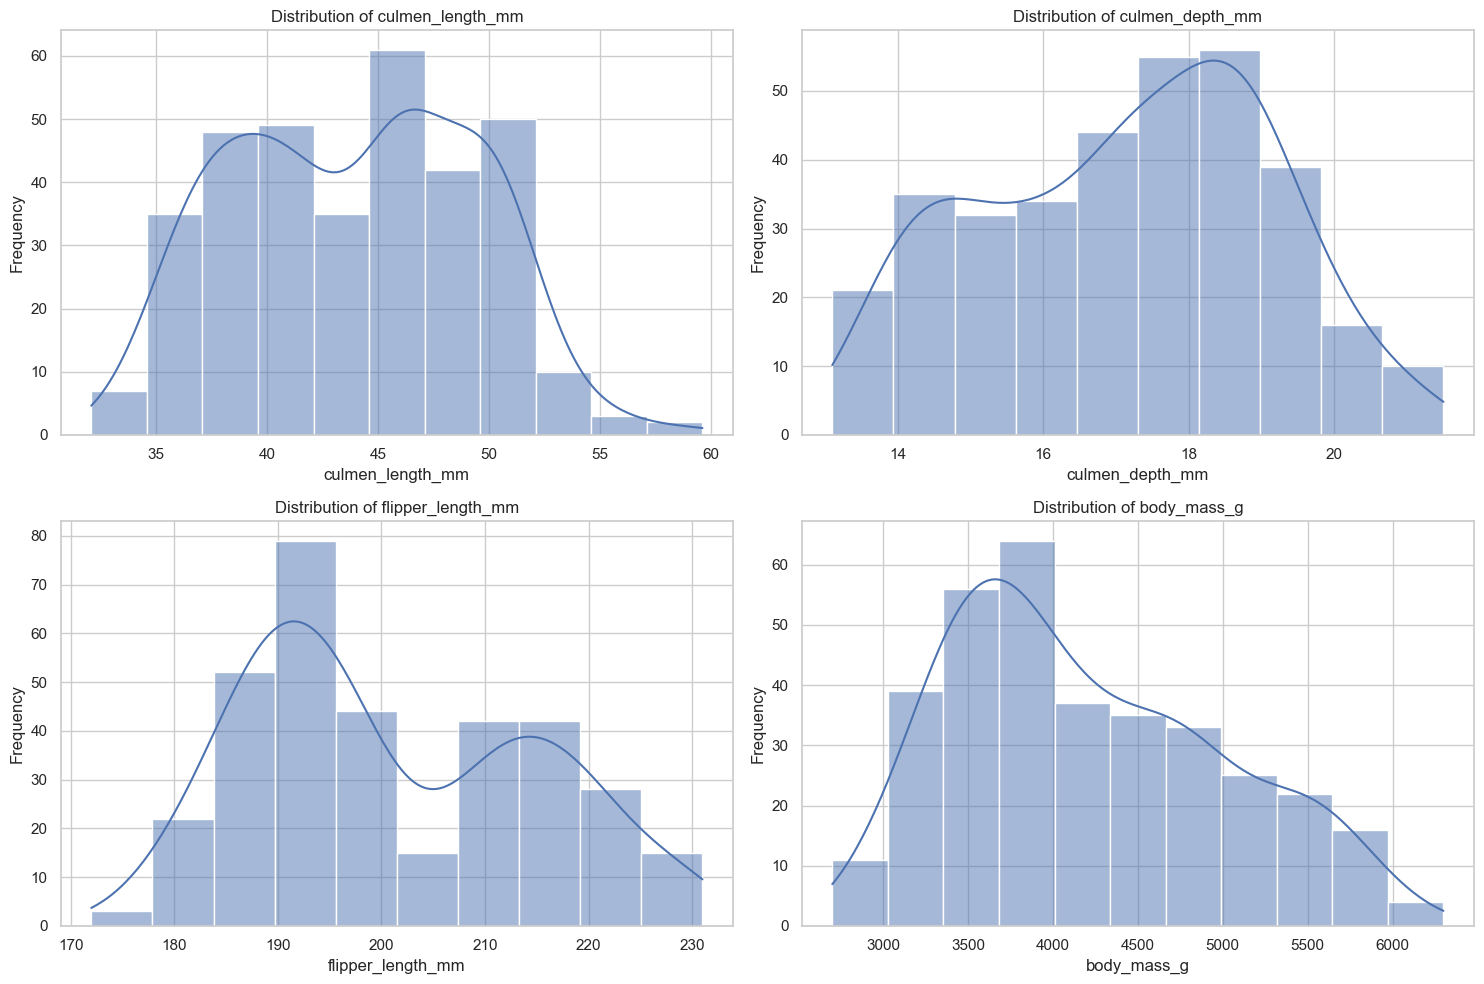

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Define numerical columns for analysis
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Plot histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(penguins_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

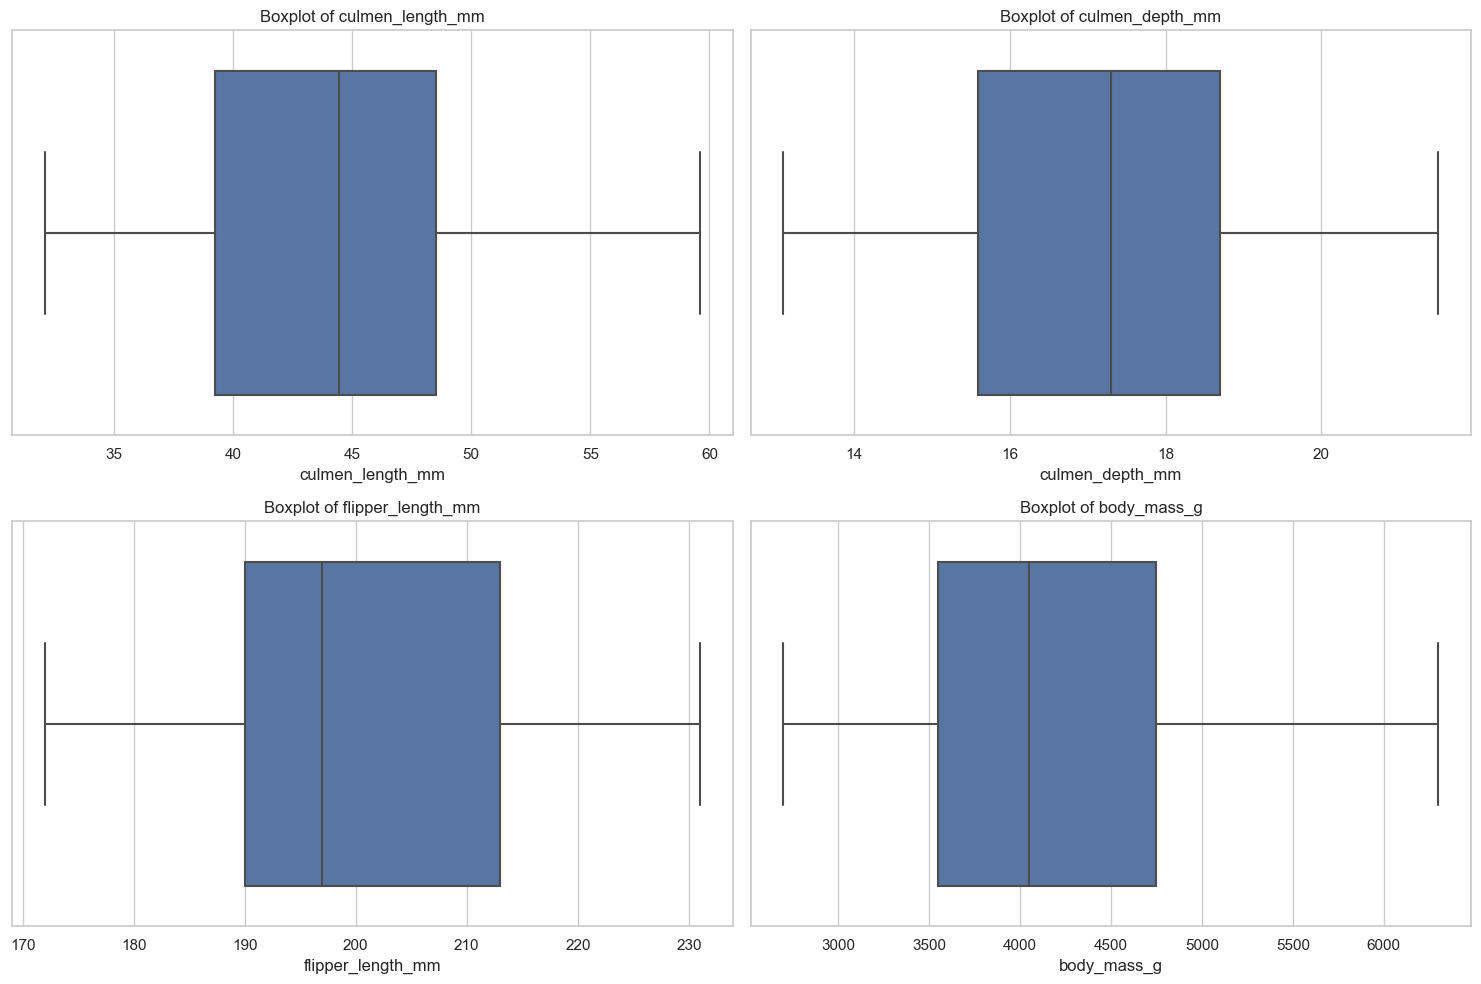

In [5]:
# Plot box plots for numerical variables to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, data=penguins_df)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [6]:
# Impute missing numerical values with median
numerical_median = penguins_df[numerical_columns].median()
penguins_df[numerical_columns] = penguins_df[numerical_columns].fillna(numerical_median)

# Impute missing categorical values with mode
categorical_columns = ['species', 'island', 'sex']
categorical_mode = penguins_df[categorical_columns].mode().iloc[0]
penguins_df[categorical_columns] = penguins_df[categorical_columns].fillna(categorical_mode)

# Verify if there are any missing values left
missing_values_after_imputation = penguins_df.isnull().sum()
missing_values_after_imputation


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

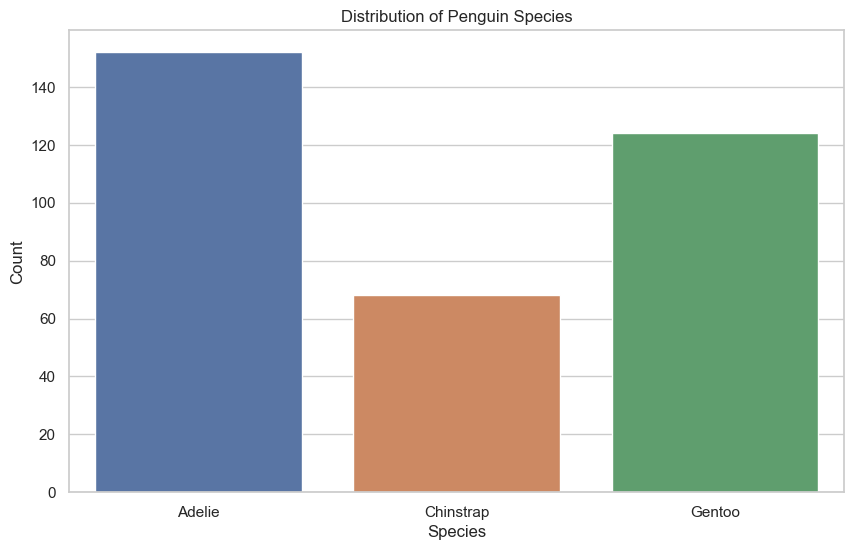

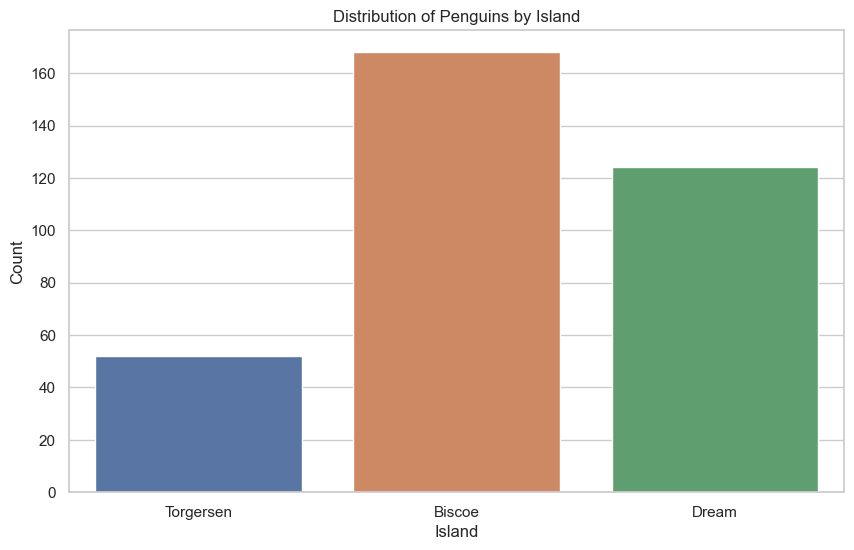

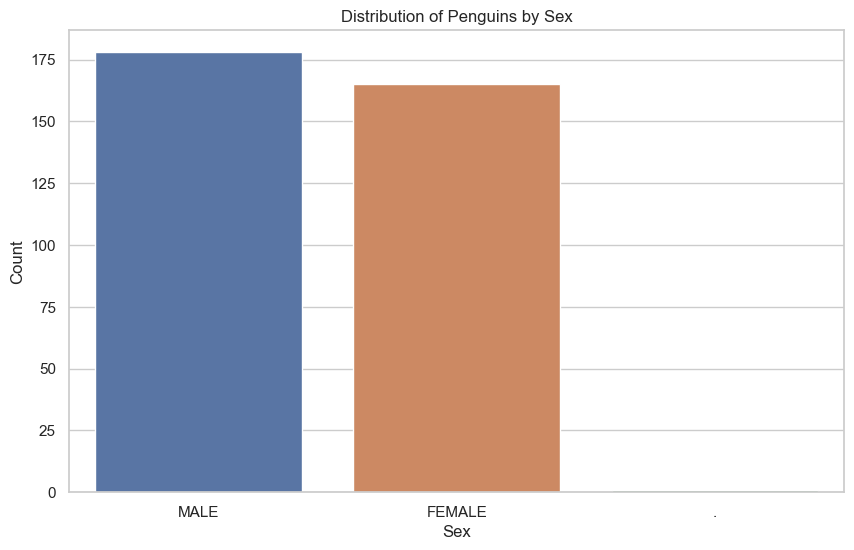

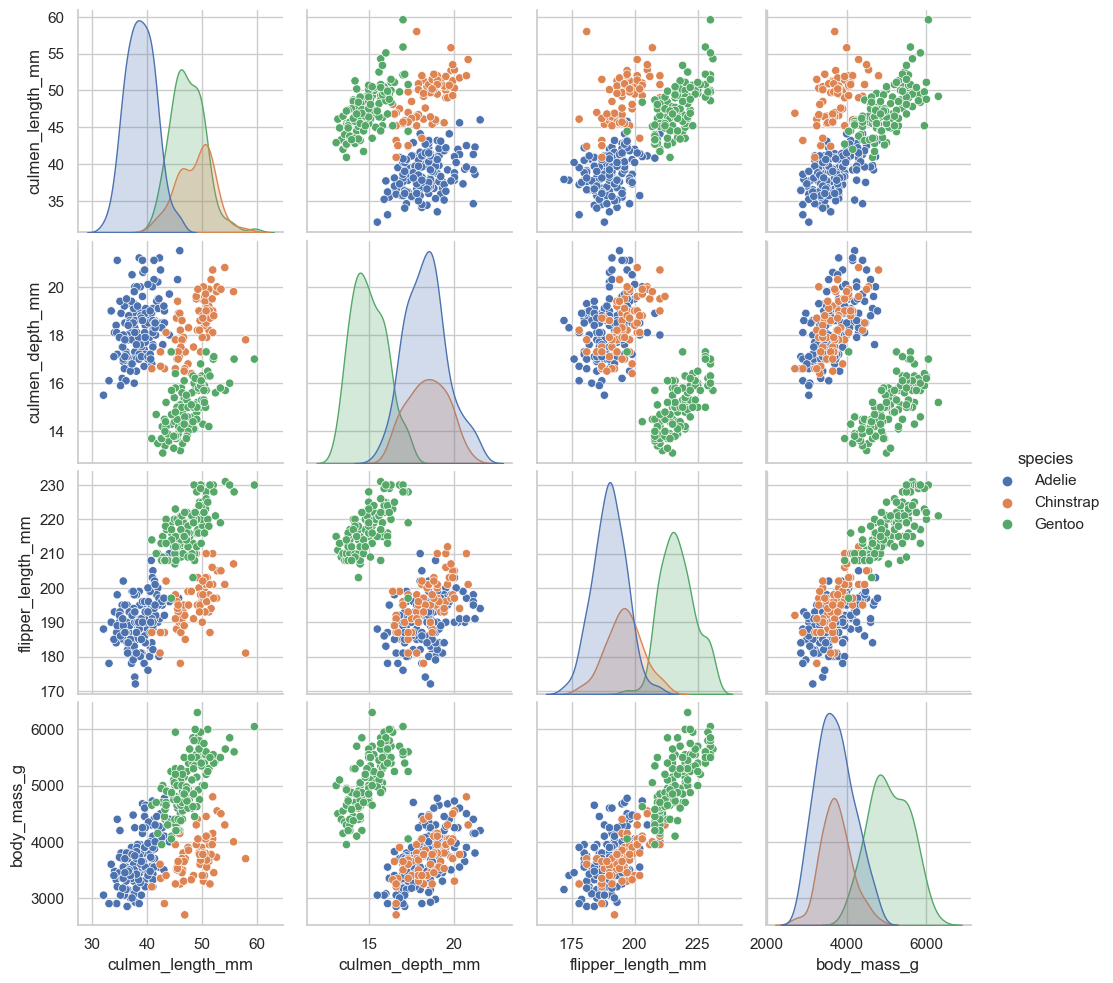

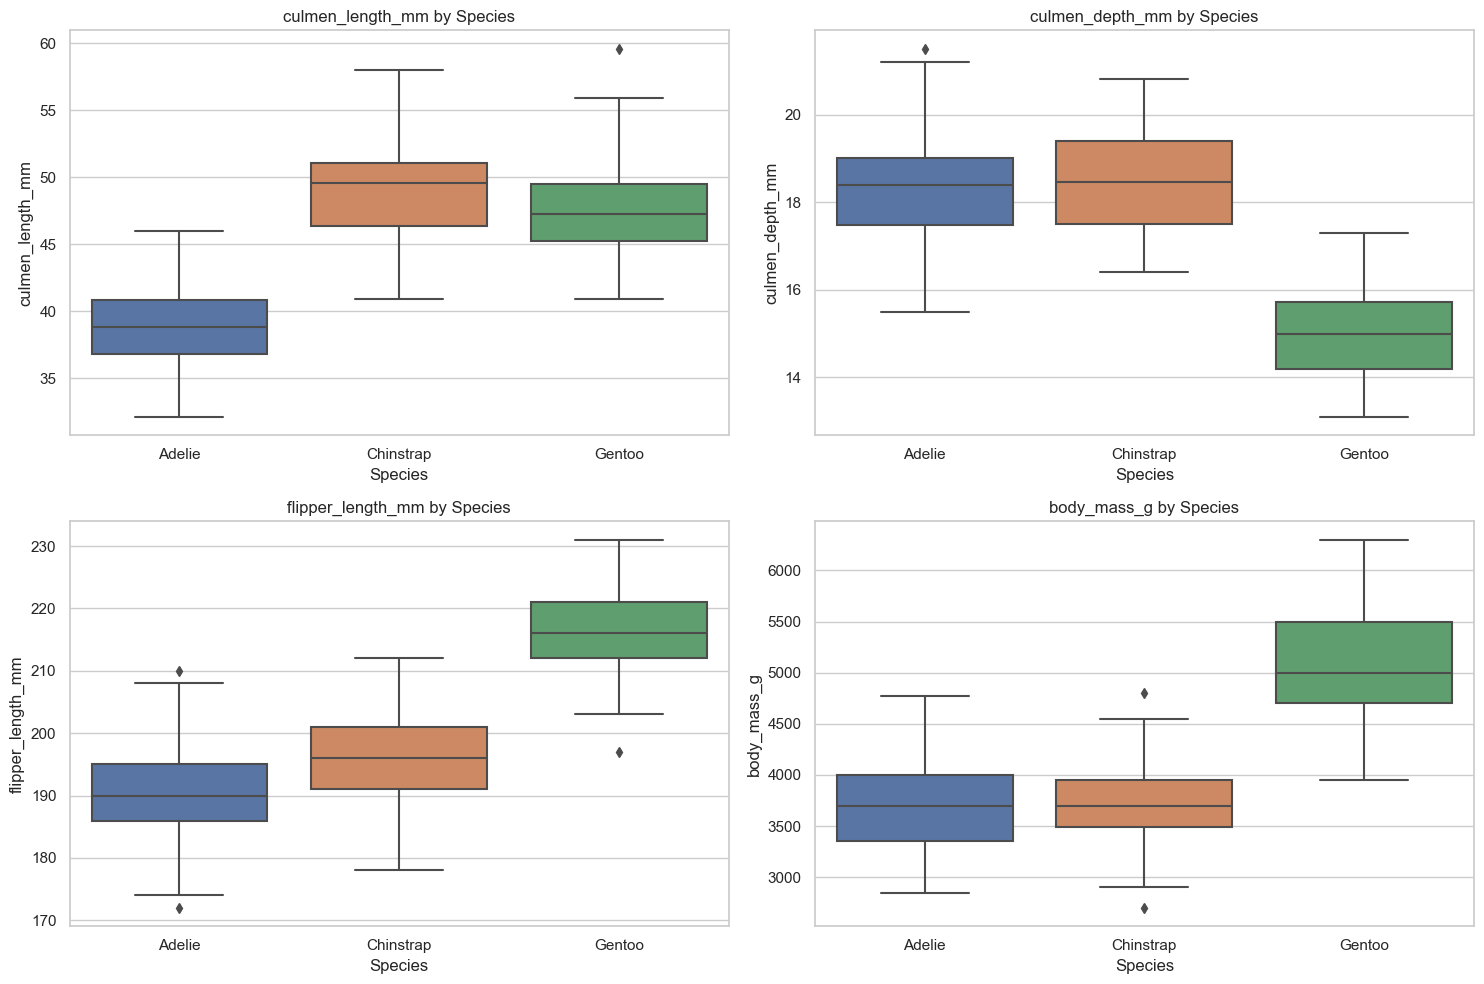

In [8]:
# Species Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins_df, x='species')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Island Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins_df, x='island')
plt.title('Distribution of Penguins by Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

# Sex Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins_df, x='sex')
plt.title('Distribution of Penguins by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Pairplot for numerical features
sns.pairplot(penguins_df, hue='species', diag_kind='kde')
plt.show()

# Boxplots by species
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=penguins_df)
    plt.title(f'{col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


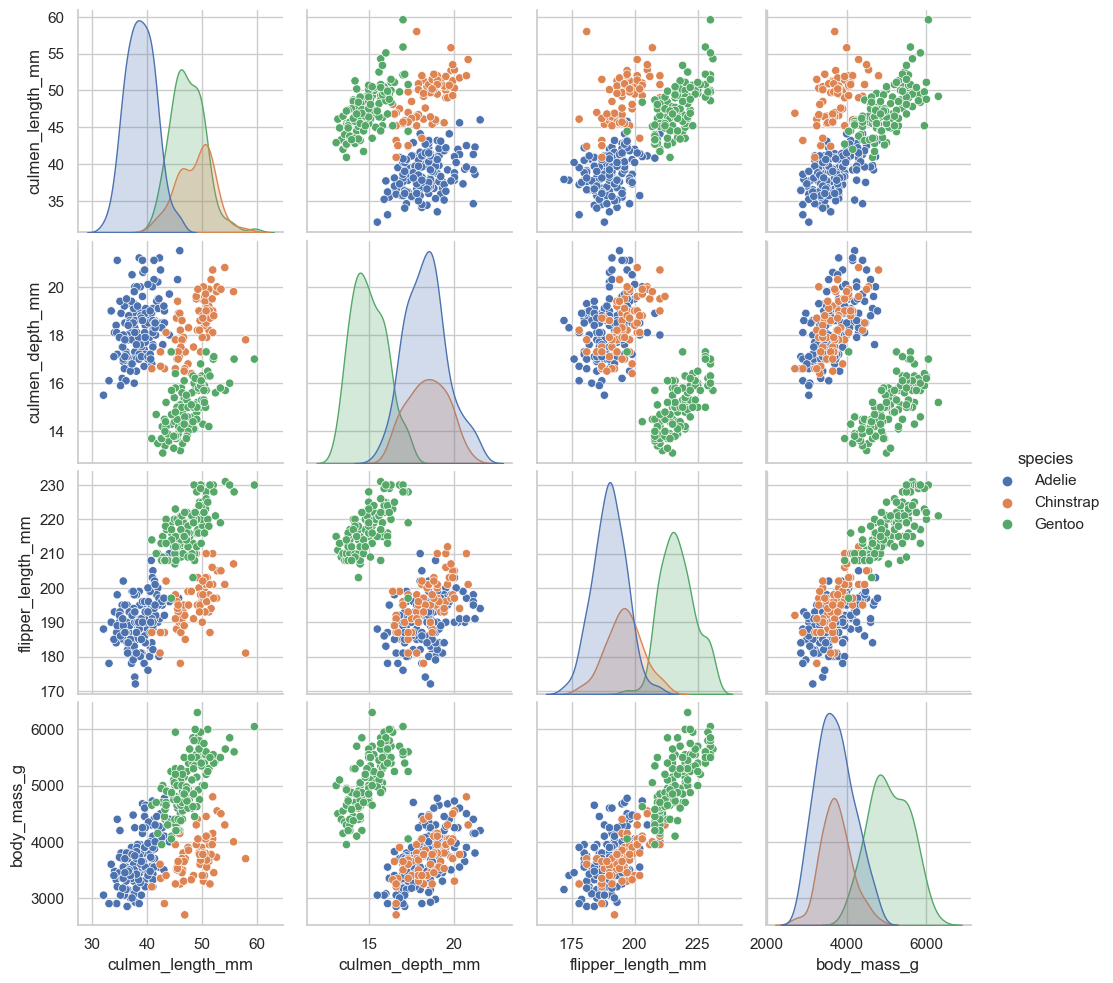

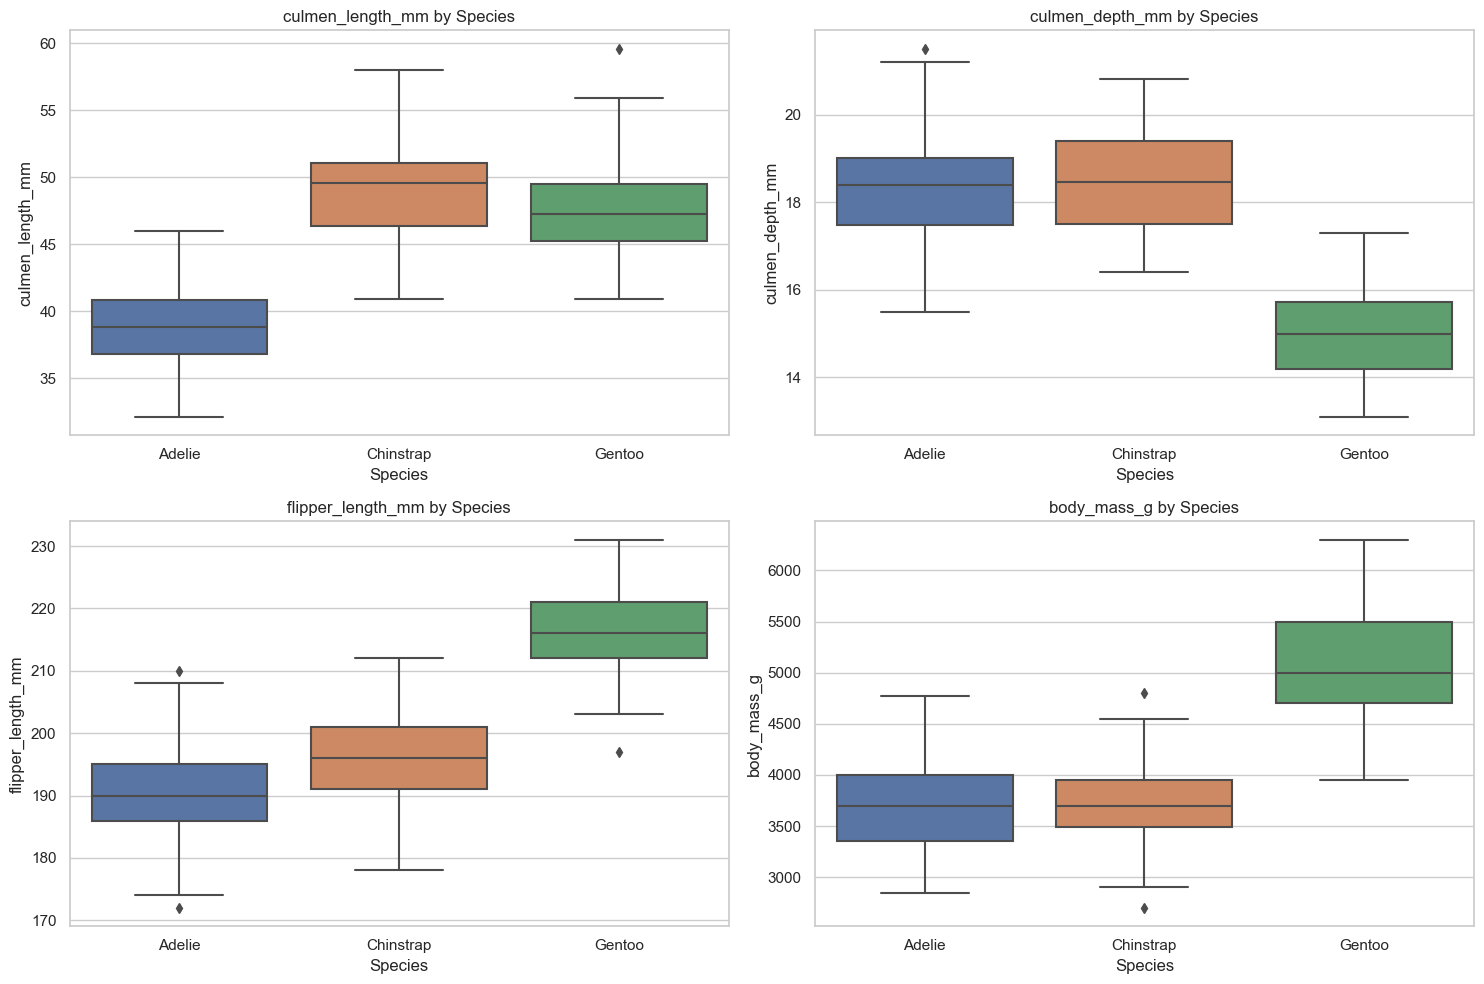

In [9]:
# Ensure numerical columns are correctly typed
penguins_df[numerical_columns] = penguins_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Retrying the pairplot for numerical features
sns.pairplot(penguins_df, hue='species', diag_kind='kde')
plt.show()

# Boxplots by species
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=penguins_df)
    plt.title(f'{col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Non-numeric values in culmen_length_mm:
     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen             39.10             18.7              181.0   
1    Adelie  Torgersen             39.50             17.4              186.0   
2    Adelie  Torgersen             40.30             18.0              195.0   
3    Adelie  Torgersen             44.45             17.3              197.0   
4    Adelie  Torgersen             36.70             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe             44.45             17.3              197.0   
340  Gentoo     Biscoe             46.80             14.3              215.0   
341  Gentoo     Biscoe             50.40             15.7              222.0   
342  Gentoo     Biscoe             45.20             14.8              212.0   
343  Gentoo     Biscoe             49.90             16.1              213.0   

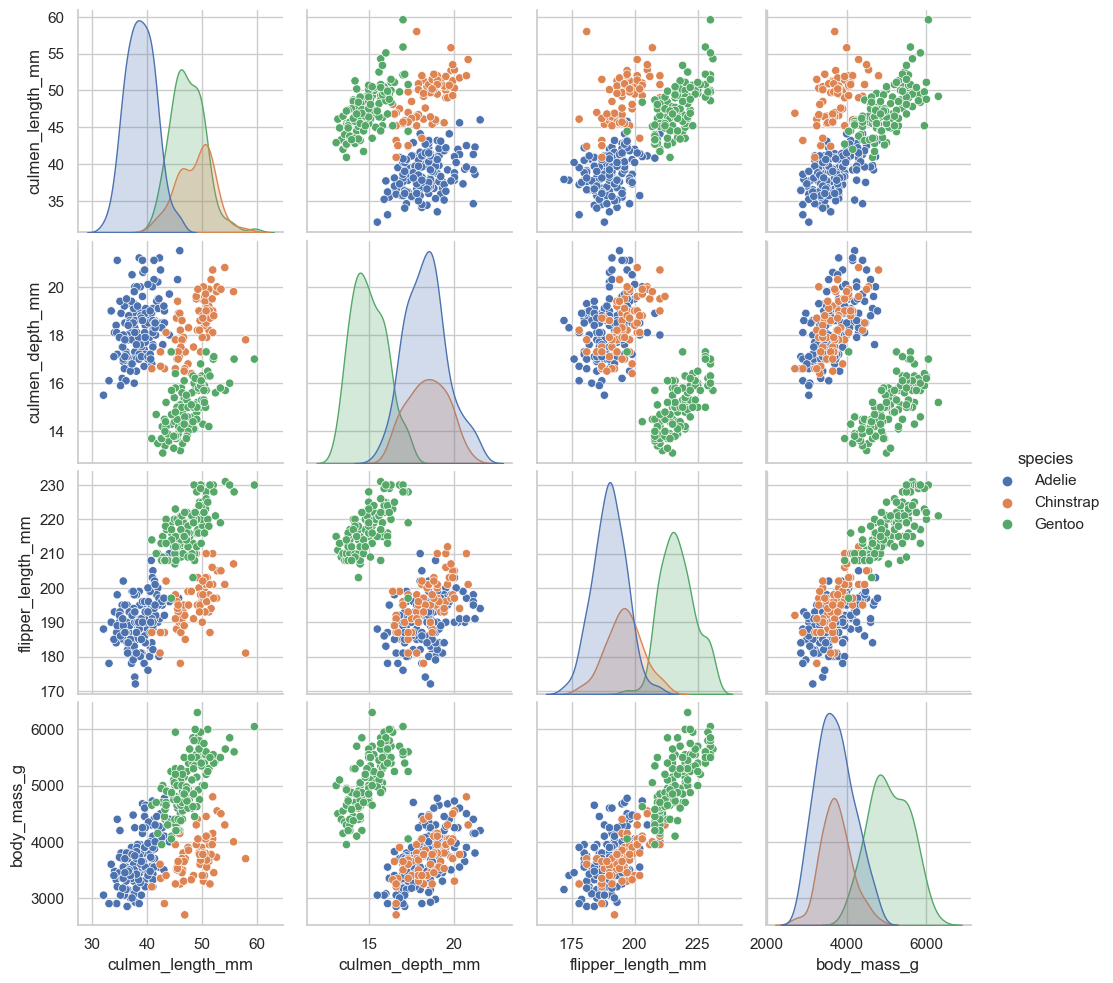

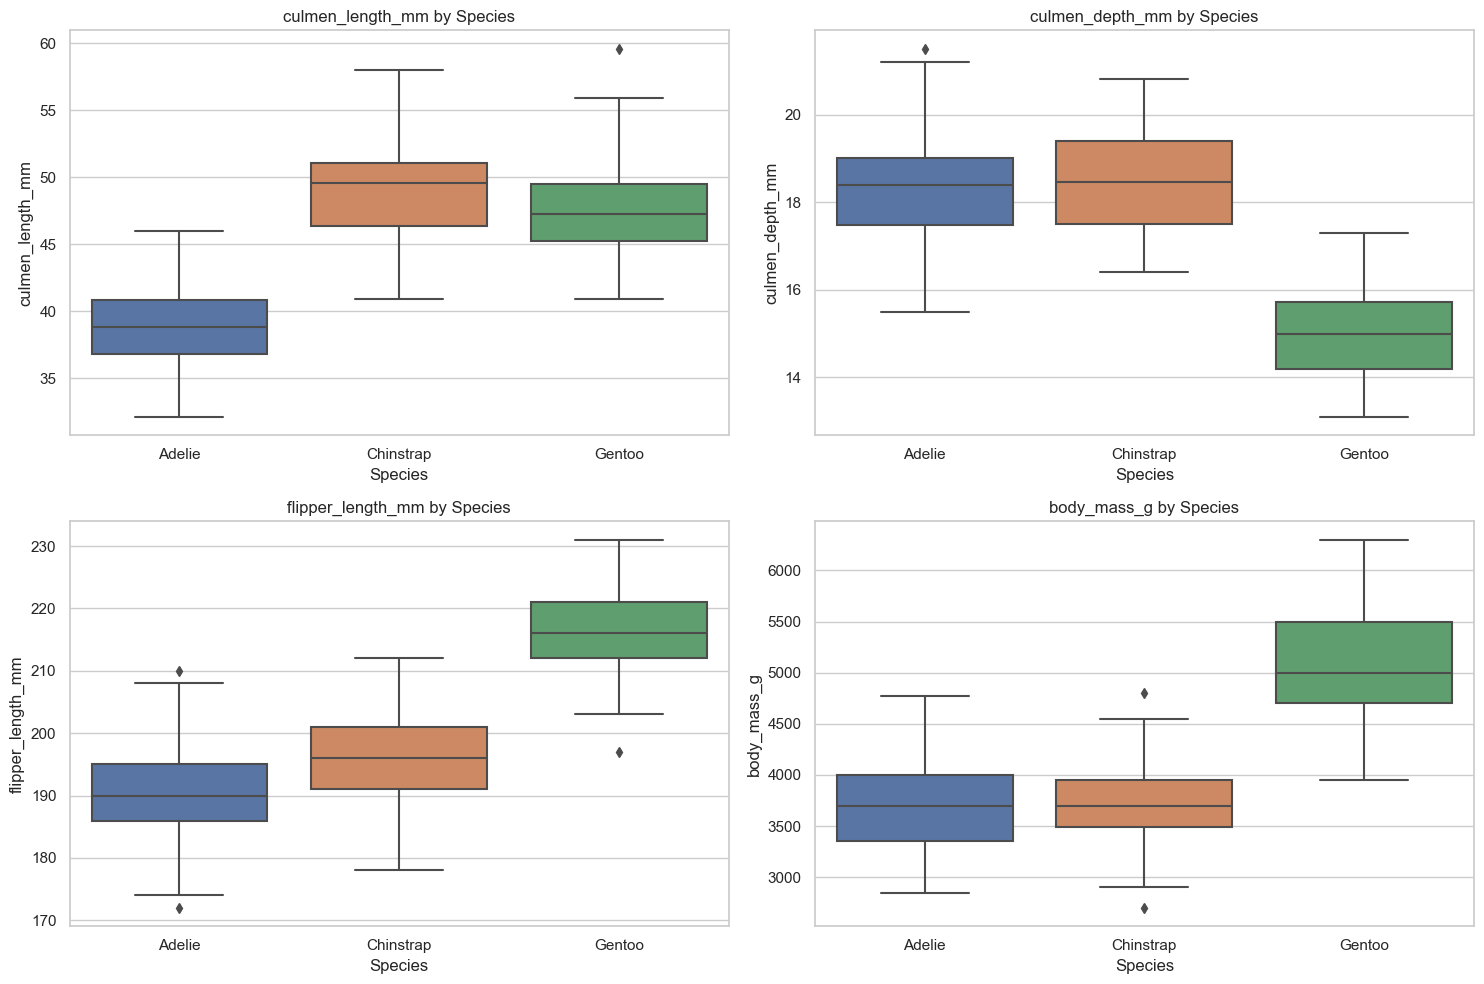

In [10]:
# Check for non-numeric values in numerical columns
for col in numerical_columns:
    non_numeric = penguins_df[~penguins_df[col].apply(lambda x: pd.api.types.is_numeric_dtype(x))]
    if not non_numeric.empty:
        print(f"Non-numeric values in {col}:\n", non_numeric)

# Ensure numerical columns are correctly typed again
penguins_df[numerical_columns] = penguins_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Drop any remaining rows with NaN values in numerical columns
penguins_df = penguins_df.dropna(subset=numerical_columns)

# Retry the pairplot for numerical features
sns.pairplot(penguins_df, hue='species', diag_kind='kde')
plt.show()

# Boxplots by species
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=penguins_df)
    plt.title(f'{col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


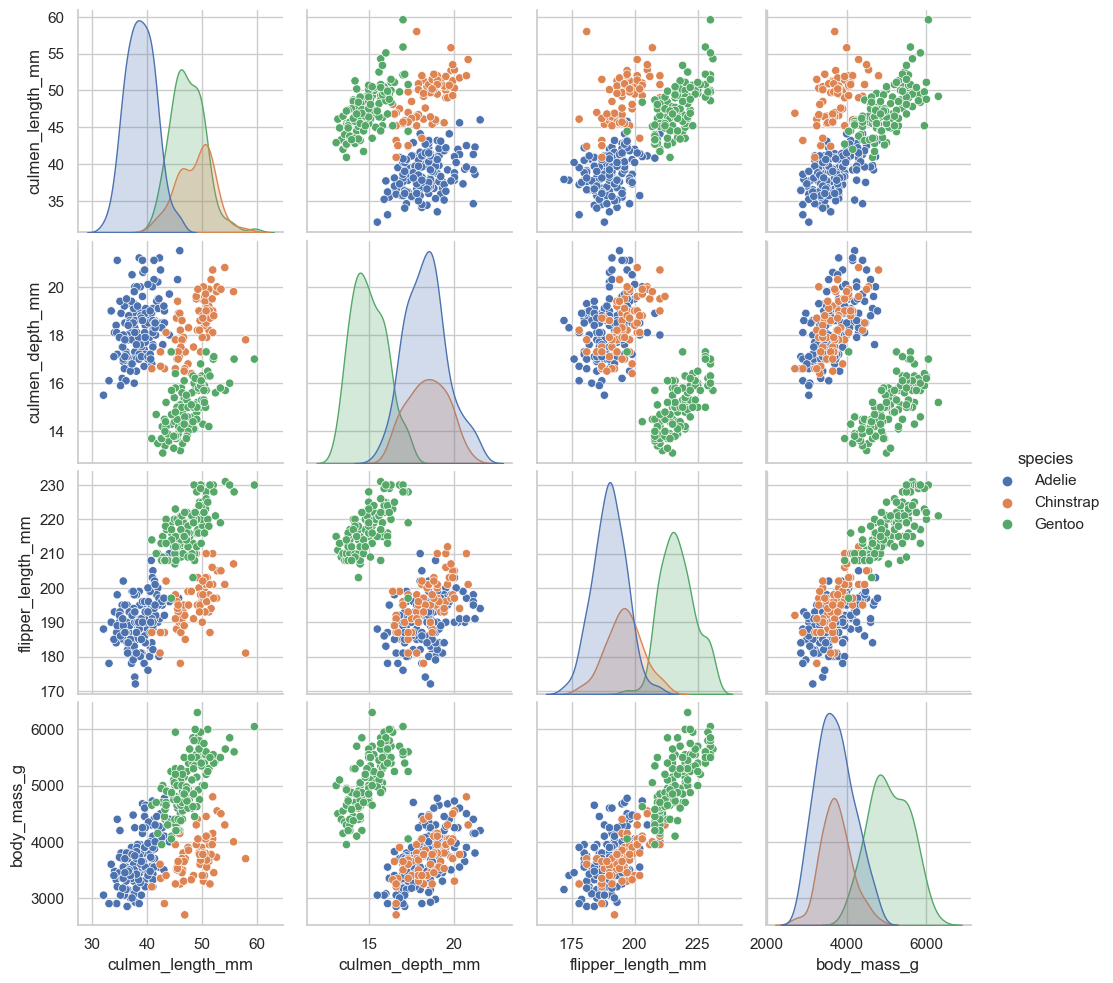

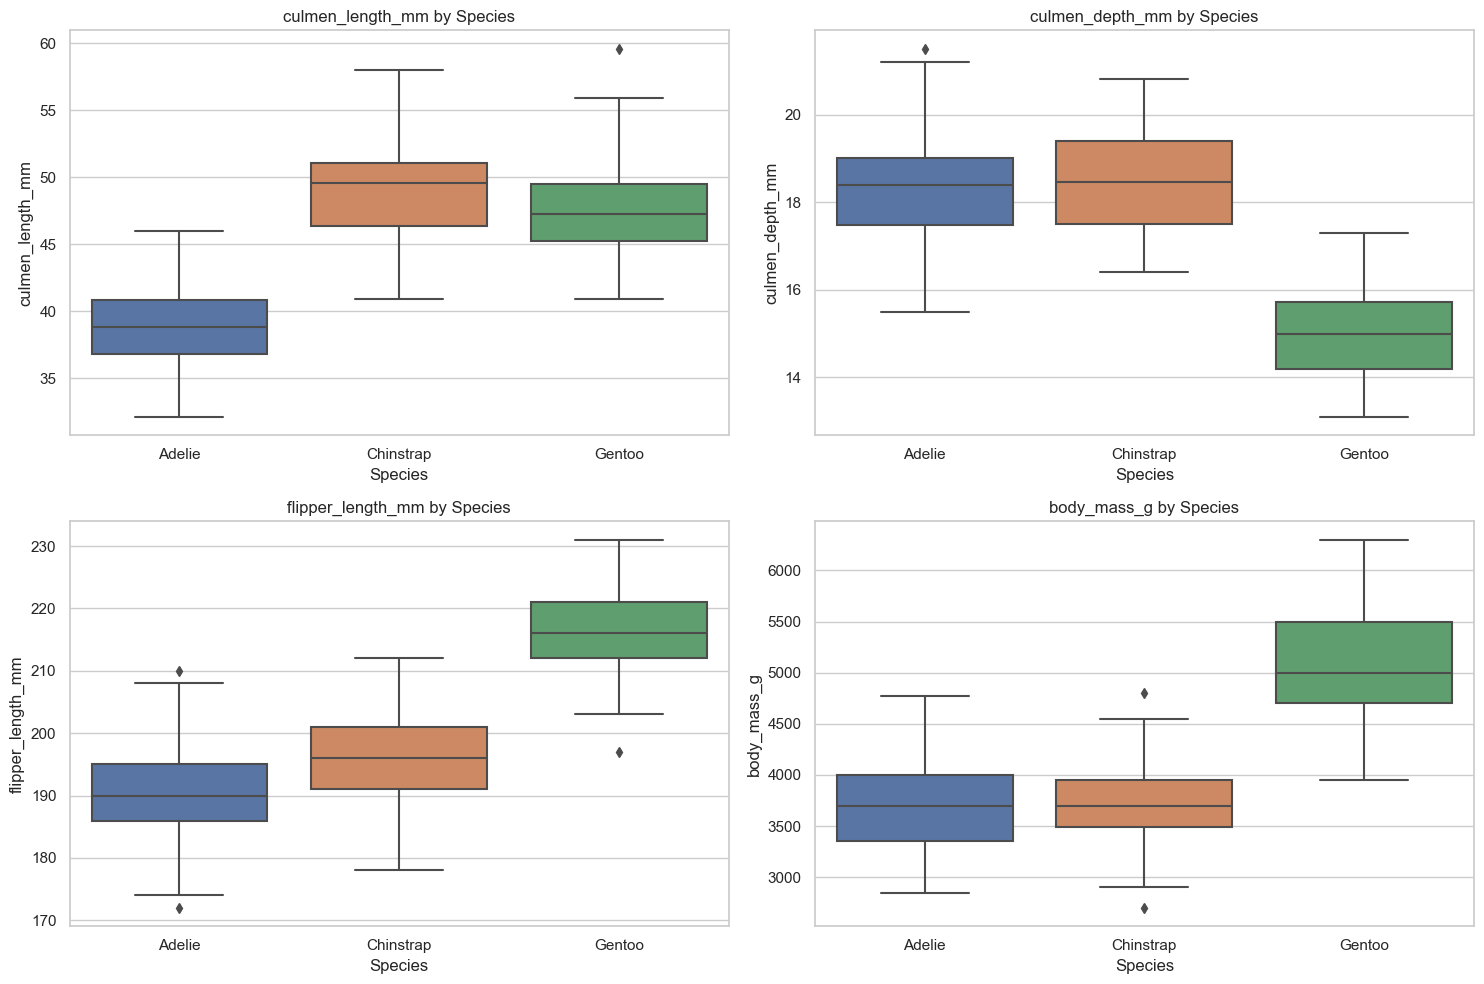

In [11]:
# Identify any non-numeric entries in the numerical columns
for col in numerical_columns:
    non_numeric_entries = penguins_df[penguins_df[col].apply(lambda x: not isinstance(x, (int, float)))]
    if not non_numeric_entries.empty:
        print(f"Non-numeric entries in {col}:\n", non_numeric_entries)

# Convert numerical columns to proper numeric types, coercing errors to NaN and then dropping them
penguins_df[numerical_columns] = penguins_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in numerical columns
penguins_df.dropna(subset=numerical_columns, inplace=True)

# Verify if all data is now numeric
penguins_df.info()

# Retry the pairplot for numerical features
sns.pairplot(penguins_df, hue='species', diag_kind='kde')
plt.show()

# Boxplots by species
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=penguins_df)
    plt.title(f'{col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


culmen_length_mm is numeric
culmen_depth_mm is numeric
flipper_length_mm is numeric
body_mass_g is numeric


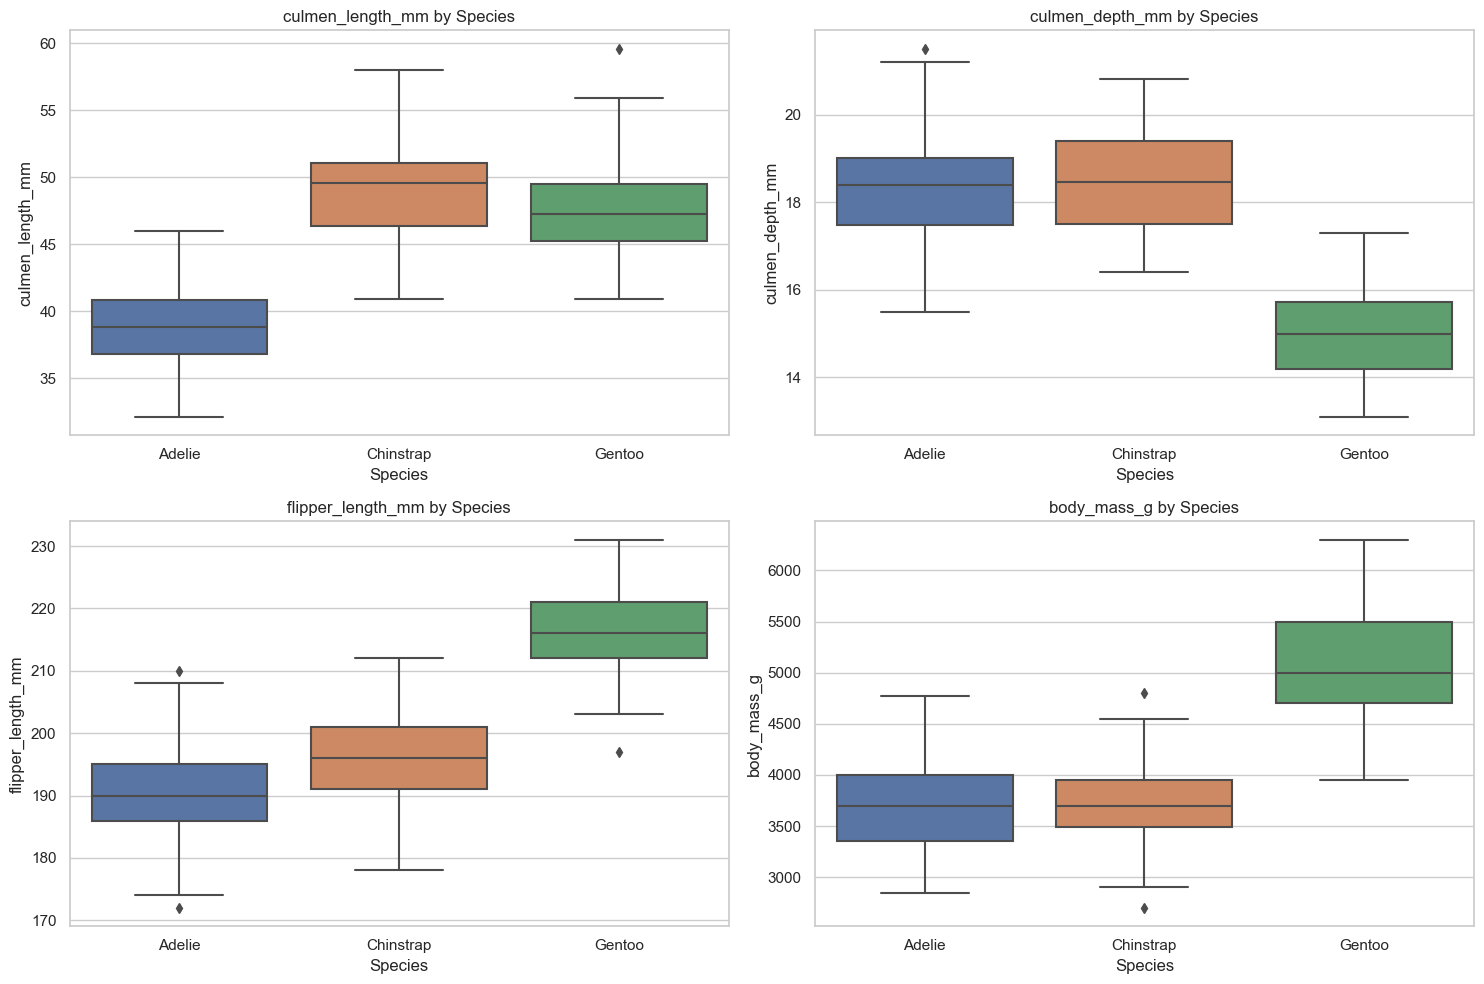

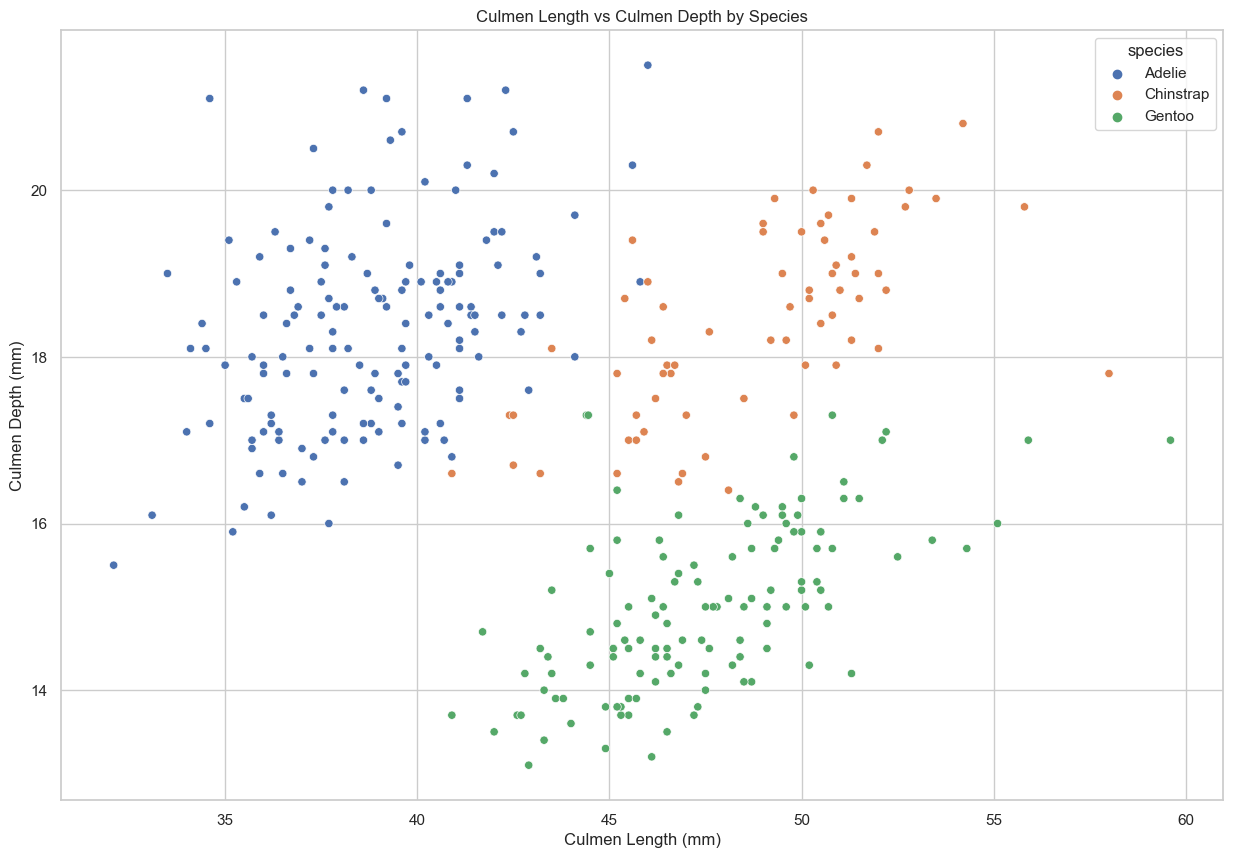

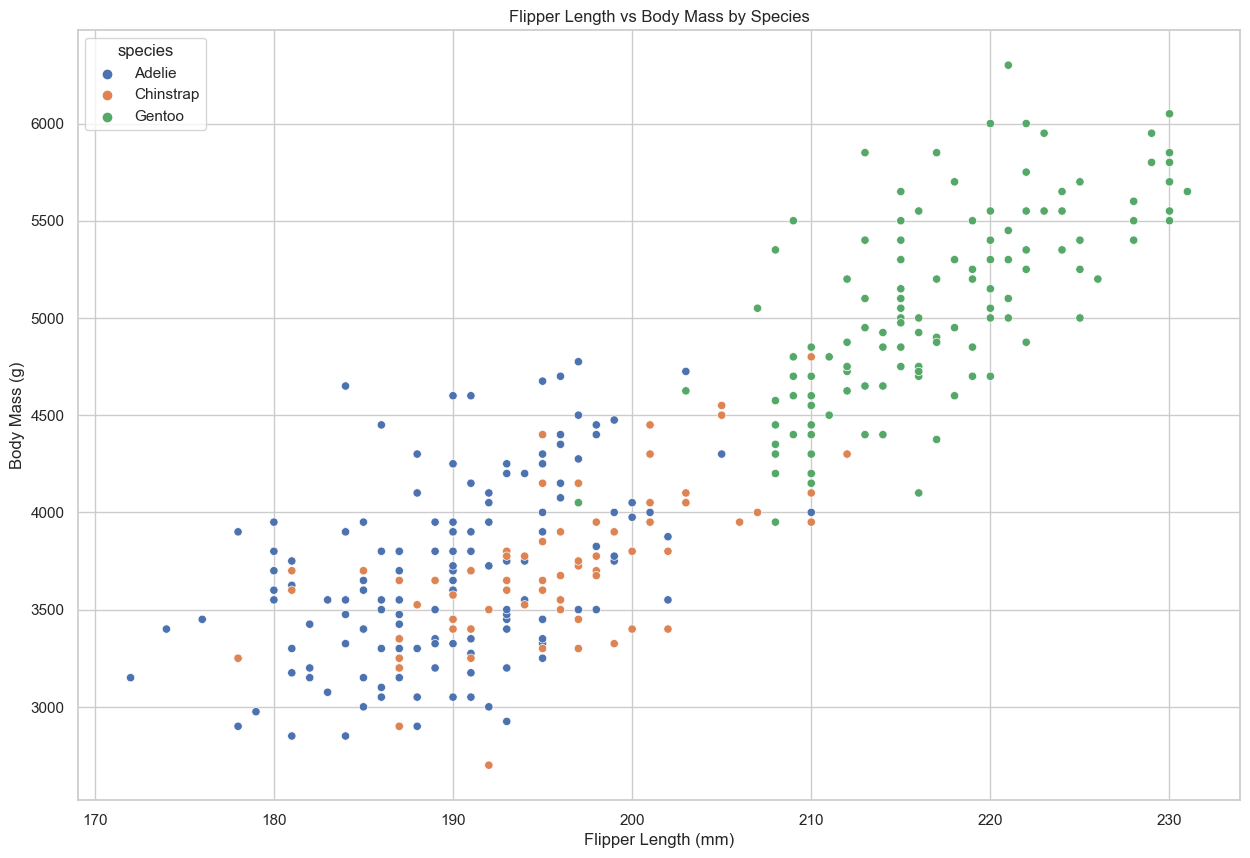

In [12]:
# Verify numerical columns to ensure they contain valid data
for col in numerical_columns:
    if not pd.api.types.is_numeric_dtype(penguins_df[col]):
        print(f"Non-numeric values in {col} after conversion")
    else:
        print(f"{col} is numeric")

# Plot boxplots by species
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=penguins_df)
    plt.title(f'{col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Plot scatter plots to explore relationships between numerical features and species
plt.figure(figsize=(15, 10))
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Culmen Length vs Culmen Depth by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

plt.figure(figsize=(15, 10))
sns.scatterplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper Length vs Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


In [13]:
# Save the cleaned dataset as a CSV file
cleaned_file_path = 'C:/Users/fajar/Downloads/cleaned_penguins_data.csv'
penguins_df.to_csv(cleaned_file_path, index=False)

cleaned_file_path

'C:/Users/fajar/Downloads/cleaned_penguins_data.csv'